This whole project is just repeat of the Projects/algerian_forest_dataset. I am just repeating for the sake of practice. If you want you can refer and practice along with me, or can skip this 'prjct2' directory. Happy Learning!

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

import pickle

In [2]:
df = pd.read_csv('../cleaned_df.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [4]:
df.drop(columns={'day', 'month', 'year'}, inplace=True, axis=1)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


Now, let's separate our independent and dependent features, i.e. input features and output features

In [6]:
X = df.drop('FWI', axis=1)

In [7]:
y = df['FWI']

In [8]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [9]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [10]:
type(X)

pandas.core.frame.DataFrame

In [11]:
type(y)

pandas.core.series.Series

Now, let's split our data into train and test splits

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((194, 11), (49, 11), (194,), (49,))

In [14]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


In [15]:
def drop_highly_correlated(df, threshold):
    """
    Drops features from df that are highly correlated with others.
    
    Parameters:
        df : pd.DataFrame (independent features only)
        threshold : float (correlation threshold)
    
    Returns:
        reduced_df : pd.DataFrame (features after dropping redundant ones)
        dropped_features : list of dropped column names
    """
    corr_matrix = df.corr().abs()  # absolute correlation
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    dropped_features = [col for col in upper.columns if any(upper[col] > threshold)]
    reduced_df = df.drop(columns=dropped_features)
    
    return reduced_df, dropped_features


In [16]:
X_train_reduced, dropped = drop_highly_correlated(X_train, threshold=0.85)
print("Dropped features:", dropped)

Dropped features: ['DC', 'BUI']


In [17]:
X_test_reduced, dropped = drop_highly_correlated(X_test, threshold=0.85)
print("Dropped features:", dropped)

Dropped features: ['DC', 'BUI']


In [18]:
X_train_reduced.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
115,29,65,19,0.6,68.3,5.5,1.5,0,0
207,33,37,16,0.0,92.2,61.3,13.1,1,1
158,38,43,13,0.5,85.0,13.0,4.1,1,1
132,31,42,21,0.0,90.6,18.2,13.4,1,1
84,34,64,14,0.0,88.9,40.5,9.0,1,0


In [19]:
X_train_reduced.shape, X_test_reduced.shape

((194, 9), (49, 9))

Now, let's scale the selected features

In [20]:
scaler = StandardScaler()

In [21]:
X_train_reduced = scaler.fit_transform(X_train_reduced)

In [22]:
X_test_reduced = scaler.transform(X_test_reduced)

In [23]:
X_train_reduced

array([[-0.87563202,  0.21321832,  1.28577038, ..., -0.79648833,
        -1.14434427, -1.01036297],
       [ 0.22209084, -1.65484925,  0.14504117, ...,  1.88757476,
         0.8738629 ,  0.98974332],
       [ 1.5942444 , -1.25454906, -0.99568804, ..., -0.19488798,
         0.8738629 ,  0.98974332],
       ...,
       [-1.97335488,  0.947102  ,  0.52528424, ..., -1.0972885 ,
        -1.14434427, -1.01036297],
       [ 0.49652155, -0.18708188,  0.14504117, ...,  0.56868169,
         0.8738629 ,  0.98974332],
       [-0.60120131,  1.0138187 ,  2.04625653, ..., -0.88904223,
        -1.14434427, -1.01036297]], shape=(194, 9))

In [24]:
X_test_reduced

array([[-0.32677059,  0.14650162, -0.2352019 , -0.38015572,  0.61070375,
        -0.07699537,  0.17532762,  0.8738629 , -1.01036297],
       [ 0.22209084, -0.52066537, -0.99568804, -0.38015572,  0.71720269,
        -0.40637763,  0.33729694,  0.8738629 , -1.01036297],
       [-1.15006273, -0.25379858,  0.90552731,  0.6761624 , -1.02228009,
        -0.91960114, -0.86590375, -1.14434427,  0.98974332],
       [ 0.49652155, -0.25379858, -0.99568804, -0.2841268 ,  0.09950881,
         0.26770699, -0.65765748, -1.14434427,  0.98974332],
       [-0.60120131,  0.21321832, -0.61544497, -0.38015572,  0.51840466,
         0.06088557, -0.10233408,  0.8738629 ,  0.98974332],
       [ 1.86867512,  0.14650162, -2.51666033,  0.1960178 , -0.30518719,
        -0.26849668, -0.88904223, -1.14434427,  0.98974332],
       [-1.15006273,  0.8803853 ,  0.14504117, -0.38015572,  0.29120691,
        -0.82768051, -0.37999578,  0.8738629 ,  0.98974332],
       [ 1.31981369, -1.72156595, -0.99568804, -0.09206896,  0

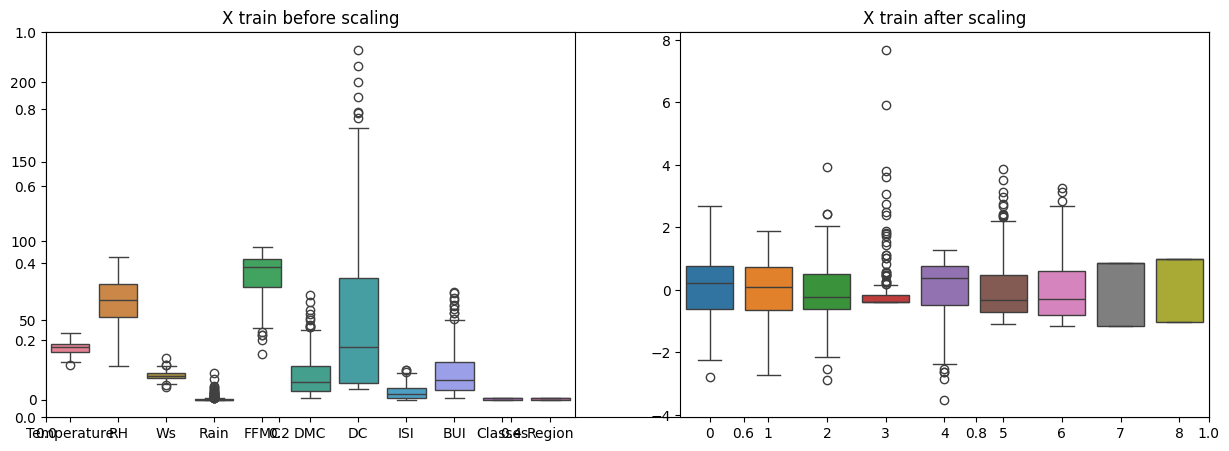

In [25]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X train before scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_reduced)
plt.title('X train after scaling')
plt.show()

## Model Training

#### 1. LinearRegression

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X_train_reduced, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
y_pred = lr.predict(X_test_reduced)

In [29]:
y_pred

array([ 8.22519075e+00,  7.79202229e+00, -2.78790834e-01,  4.35255873e+00,
        6.66767055e+00,  1.40854770e+00,  1.99494070e+00,  7.80961600e+00,
        1.73112949e+00,  3.30891017e+00,  3.45283141e-01,  9.71807910e+00,
        9.35128249e+00,  1.70641667e+01,  1.85271023e+01,  1.24547438e+00,
        1.91190325e+00,  1.15292017e-02,  7.19193092e+00,  3.07552423e+00,
        1.43106426e+00,  2.28565630e-01,  6.60694070e+00,  3.12916618e-01,
        2.11965139e+01,  5.13996171e+00,  5.92667011e+00,  9.81755385e+00,
       -2.52764587e-02,  9.81141259e+00,  6.59659846e+00, -4.24797540e-01,
        1.03857529e+01,  1.45659625e+01,  1.48302531e+00,  4.32843721e-01,
        2.01268203e+00,  6.07941922e+00, -4.77057528e-01, -4.29405448e-01,
        6.69939047e+00,  1.83829007e+00,  8.62235208e+00, -2.55650163e-01,
        1.55137765e+01,  8.31680623e+00,  8.20529717e+00,  1.43655762e+00,
        1.29816715e+01])

In [30]:
lr.coef_

array([-0.02653611, -0.1808412 , -0.01415259, -0.0330928 , -0.82478219,
        3.80917655,  4.89287492,  0.39085739, -0.4004259 ])

In [31]:
lr.intercept_

np.float64(7.420103092783505)

In [32]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

In [33]:
mse, mae, rmse, score

(0.5882990110708693,
 0.5049978694165687,
 0.7670065260940544,
 0.9805895859259882)

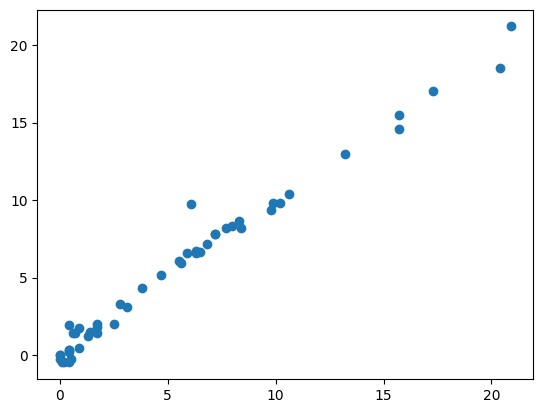

In [34]:
plt.scatter(y_test, y_pred)
plt.show()

#### 2. Lasso

In [35]:
lasso = Lasso()

In [36]:
lasso.fit(X_train_reduced, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [37]:
y_pred2 = lasso.predict(X_test_reduced)

In [38]:
y_pred

array([ 8.22519075e+00,  7.79202229e+00, -2.78790834e-01,  4.35255873e+00,
        6.66767055e+00,  1.40854770e+00,  1.99494070e+00,  7.80961600e+00,
        1.73112949e+00,  3.30891017e+00,  3.45283141e-01,  9.71807910e+00,
        9.35128249e+00,  1.70641667e+01,  1.85271023e+01,  1.24547438e+00,
        1.91190325e+00,  1.15292017e-02,  7.19193092e+00,  3.07552423e+00,
        1.43106426e+00,  2.28565630e-01,  6.60694070e+00,  3.12916618e-01,
        2.11965139e+01,  5.13996171e+00,  5.92667011e+00,  9.81755385e+00,
       -2.52764587e-02,  9.81141259e+00,  6.59659846e+00, -4.24797540e-01,
        1.03857529e+01,  1.45659625e+01,  1.48302531e+00,  4.32843721e-01,
        2.01268203e+00,  6.07941922e+00, -4.77057528e-01, -4.29405448e-01,
        6.69939047e+00,  1.83829007e+00,  8.62235208e+00, -2.55650163e-01,
        1.55137765e+01,  8.31680623e+00,  8.20529717e+00,  1.43655762e+00,
        1.29816715e+01])

In [39]:
mse2 = mean_squared_error(y_test, y_pred2)
mae2 = mean_absolute_error(y_test, y_pred2)
rmse2 = root_mean_squared_error(y_test, y_pred2)
score2 = r2_score(y_test, y_pred2)

In [40]:
mse2, mae2, rmse2, score2

(1.726042325023142, 1.0093958923873407, 1.31378930008702, 0.9430507350726562)

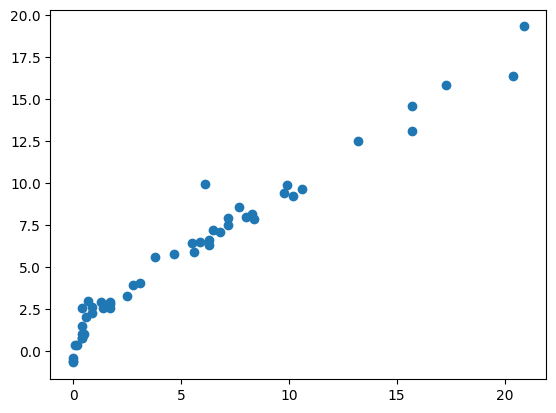

In [41]:
plt.scatter(y_test, y_pred2)
plt.show()

## Cross Validation Lasso

In [42]:
lassocv = LassoCV(cv=5)

In [43]:
lassocv.fit(X_train_reduced, y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [44]:
lassocv.alpha_

np.float64(0.04391080246587261)

In [45]:
lassocv.alphas_

array([7.1563667 , 6.67405153, 6.2242428 , 5.80474966, 5.41352896,
       5.04867523, 4.70841142, 4.39108025, 4.09513613, 3.81913766,
       3.56174057, 3.32169117, 3.09782031, 2.88903759, 2.69432612,
       2.51273756, 2.34338746, 2.18545099, 2.0381589 , 1.90079382,
       1.77268667, 1.65321353, 1.54179247, 1.43788081, 1.34097246,
       1.2505954 , 1.16630946, 1.08770411, 1.01439649, 0.94602956,
       0.88227033, 0.82280827, 0.76735374, 0.71563667, 0.66740515,
       0.62242428, 0.58047497, 0.5413529 , 0.50486752, 0.47084114,
       0.43910802, 0.40951361, 0.38191377, 0.35617406, 0.33216912,
       0.30978203, 0.28890376, 0.26943261, 0.25127376, 0.23433875,
       0.2185451 , 0.20381589, 0.19007938, 0.17726867, 0.16532135,
       0.15417925, 0.14378808, 0.13409725, 0.12505954, 0.11663095,
       0.10877041, 0.10143965, 0.09460296, 0.08822703, 0.08228083,
       0.07673537, 0.07156367, 0.06674052, 0.06224243, 0.0580475 ,
       0.05413529, 0.05048675, 0.04708411, 0.0439108 , 0.04095

In [46]:
lassocv.mse_path_

array([[68.58934997, 64.28650232, 49.25415197, 79.11474083, 38.68688171],
       [63.2664675 , 58.77362304, 43.20292636, 77.07183352, 34.66910628],
       [56.87389457, 51.79652473, 37.15764773, 69.4806422 , 31.16497557],
       [51.2737596 , 45.69461734, 31.98560721, 62.80993539, 27.46286399],
       [45.36816855, 40.35928545, 27.56726322, 56.94442062, 23.75447628],
       [39.875005  , 35.69250404, 23.79907917, 50.31847875, 20.54655878],
       [35.0794232 , 31.60885664, 20.59132915, 44.35263414, 17.77349727],
       [30.89154006, 28.0342798 , 17.86626498, 39.14265375, 15.37720198],
       [27.23334321, 24.90389594, 15.55674604, 34.59116894, 13.30754905],
       [24.03652419, 22.16129069, 13.60451947, 30.61376519, 11.52101422],
       [21.24273995, 19.75730052, 11.95924131, 27.13693185,  9.97950732],
       [18.80004176, 17.64896267, 10.57738151, 24.09623192,  8.65087048],
       [16.66356323, 15.79916526,  9.42117661, 21.43679316,  7.50627555],
       [14.79422393, 14.17520895,  8.4

In [47]:
y_pred3 = lassocv.predict(X_test_reduced)

In [48]:
y_pred3

array([ 8.18663266,  7.70019213, -0.2903297 ,  4.63474259,  6.74887378,
        1.69185044,  2.18294469,  7.60463301,  1.94706338,  3.35359404,
        0.57397807,  9.87337629,  9.35427849, 17.02676621, 18.37194357,
        1.5304227 ,  1.5960953 , -0.52728438,  7.28818222,  3.05013272,
        1.90263103,  0.19405617,  6.49047095,  0.15979868, 21.13853803,
        5.07328595,  5.85087005,  9.77439514, -0.62816931,  9.93571457,
        6.72518268, -0.36716153, 10.34290458, 14.4714937 ,  1.65446616,
        0.7459854 ,  2.01575197,  5.92456507, -0.59756537, -0.52186736,
        6.46663487,  2.01373643,  8.46819727, -0.73832638, 15.45949352,
        8.33848004,  8.45866066,  1.4244129 , 13.0465774 ])

In [49]:
mse3 = mean_squared_error(y_test, y_pred3)
mae3 = mean_absolute_error(y_test, y_pred3)
rmse3 = root_mean_squared_error(y_test, y_pred3)
score3 = r2_score(y_test, y_pred3)

In [50]:
mse3, mae3, rmse3, score3

(0.6568370026125329, 0.5556715031617872, 0.8104548121965425, 0.978328234520343)

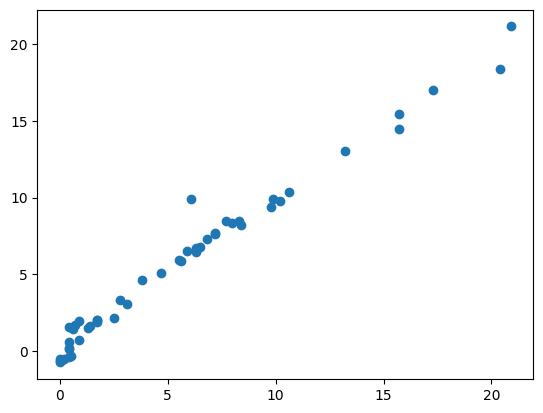

In [51]:
plt.scatter(y_test, y_pred3)

#### Ridge Regression Model

In [52]:
ridge = Ridge()

In [53]:
ridge.fit(X_train_reduced, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [54]:
y_pred4 = ridge.predict(X_test_reduced)

In [55]:
y_pred4

array([ 8.23999312,  7.81028989, -0.23449906,  4.37975018,  6.70382589,
        1.41841778,  2.04982548,  7.90208798,  1.69756041,  3.37297157,
        0.39150334,  9.7381109 ,  9.37049213, 17.04397828, 18.48718859,
        1.31540983,  1.88742994, -0.09632557,  7.19071883,  3.15401501,
        1.43532282,  0.20239301,  6.63902509,  0.32619204, 21.09374547,
        5.23449032,  5.96410806,  9.8326125 , -0.13641814,  9.83127738,
        6.60502163, -0.40725925, 10.39643639, 14.56103886,  1.52662903,
        0.47240481,  2.06496849,  6.17073039, -0.53249536, -0.40158768,
        6.75573837,  1.85431958,  8.63495118, -0.33798018, 15.48377627,
        8.33235668,  8.22165908,  1.43370936, 12.98313436])

In [56]:
mse4 = mean_squared_error(y_test, y_pred4)
mae4 = mean_absolute_error(y_test, y_pred4)
rmse4 = root_mean_squared_error(y_test, y_pred4)
score4 = r2_score(y_test, y_pred4)

In [57]:
mse4, mae4, rmse4, score4

(0.6029616070548641,
 0.5192048325844797,
 0.7765060251246375,
 0.9801058063273599)

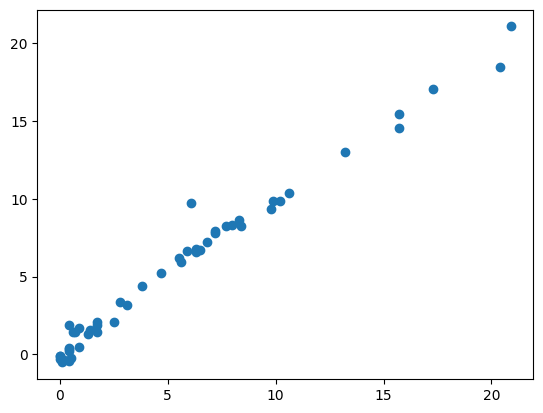

In [58]:
plt.scatter(y_test, y_pred4)

## Cross Validation Ridge

In [59]:
ridgecv = RidgeCV(cv=5)

In [60]:
ridgecv.fit(X_train_reduced, y_train)

,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,None
,cv,5
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [61]:
y_pred5 = ridgecv.predict(X_test_reduced)

In [62]:
y_pred5

array([ 8.3452612 ,  7.9509806 ,  0.08079144,  4.58089486,  6.96423011,
        1.5409334 ,  2.48149302,  8.53203653,  1.48405258,  3.81150722,
        0.73519835,  9.82484325,  9.50781086, 16.8672184 , 18.15769546,
        1.83631625,  1.66559288, -0.86078245,  7.20947897,  3.73422637,
        1.53715995,  0.04215882,  6.87559422,  0.42066407, 20.37405805,
        5.92207432,  6.22849411,  9.93825853, -0.96556387, 10.00013959,
        6.6807184 , -0.26740143, 10.46114151, 14.48457468,  1.857133  ,
        0.79412078,  2.46366944,  6.79793805, -0.90048806, -0.19958075,
        7.1405037 ,  1.99078614,  8.7046852 , -0.9161003 , 15.26912606,
        8.44968968,  8.35831412,  1.42464148, 12.99500115])

In [63]:
mse5 = mean_squared_error(y_test, y_pred5)
mae5 = mean_absolute_error(y_test, y_pred5)
rmse5 = root_mean_squared_error(y_test, y_pred5)
score5 = r2_score(y_test, y_pred5)

In [64]:
mse5, mae5, rmse5, score5

(0.841986797932755, 0.6869262008277153, 0.9175983859689134, 0.9722193780965623)

In [65]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

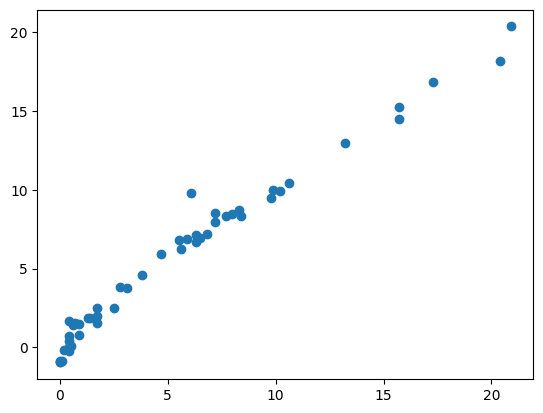

In [66]:
plt.scatter(y_test, y_pred5)

#### ElasticNet

In [67]:
en = ElasticNet()

In [68]:
en.fit(X_train_reduced, y_train)

,alpha,1.0
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [69]:
y_pred6 = en.predict(X_test_reduced)

In [70]:
y_pred6

array([ 8.51810818,  8.55010972,  1.61398157,  5.76148806,  8.07435785,
        3.7662184 ,  4.71898272,  9.86811593,  2.45857341,  4.46835384,
        1.73159924,  9.31236535, 10.04118331, 14.88806165, 15.08022867,
        3.85475313,  3.04485743, -1.05376101,  7.7022857 ,  6.395949  ,
        2.77330255,  0.76899482,  7.73549109,  1.04806106, 17.1909275 ,
        8.06897359,  7.1573182 ,  9.76030198, -1.63034879, 10.05217328,
        6.86178465,  1.81410268,  9.75626405, 12.66681749,  3.27476796,
        2.97644485,  4.25905551,  8.48047102, -0.08869883, -0.24456519,
        8.06516157,  3.64853376,  9.10140694, -1.08651447, 14.07197756,
        8.53386441,  8.70936635,  2.35674387, 12.26797033])

In [71]:
mse6 = mean_squared_error(y_test, y_pred6)
mae6 = mean_absolute_error(y_test, y_pred6)
rmse6 = root_mean_squared_error(y_test, y_pred6)
score6 = r2_score(y_test, y_pred6)

In [72]:
mse6, mae6, rmse6, score6,

(4.009921298441002, 1.6834416340136709, 2.0024787885121285, 0.8676961352267807)

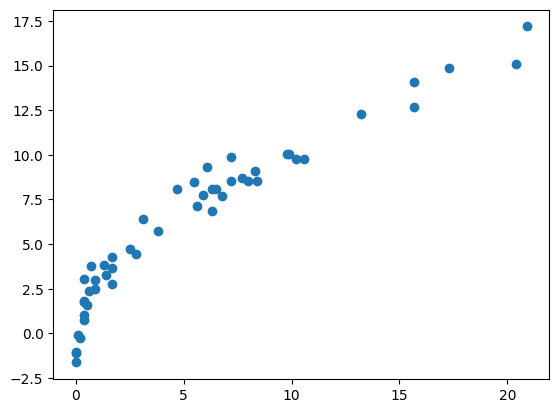

In [73]:
plt.scatter(y_test, y_pred6)

In [74]:
en.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

## Cross Validation ElasticNet

In [75]:
encv = ElasticNetCV()

In [76]:
encv.fit(X_train_reduced, y_train)

,l1_ratio,0.5
,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,cv,None
,copy_X,True
,verbose,0


In [77]:
y_pred7 = encv.predict(X_test_reduced)

In [78]:
y_pred7

array([ 8.25771677,  7.82616361, -0.18562215,  4.51629301,  6.79371784,
        1.5650096 ,  2.19783323,  7.98821712,  1.72976234,  3.45953427,
        0.5013797 ,  9.81166304,  9.41110079, 16.99115101, 18.35959568,
        1.53757503,  1.78323237, -0.44433528,  7.2393796 ,  3.29188459,
        1.59240416,  0.14022662,  6.66126658,  0.269896  , 20.91191095,
        5.37638878,  6.00972407,  9.85014415, -0.43791279,  9.89026814,
        6.65664977, -0.32247028, 10.38871268, 14.51590118,  1.64047382,
        0.63498271,  2.15228908,  6.27049583, -0.67345875, -0.48221284,
        6.78394281,  1.95365431,  8.62906164, -0.64362843, 15.42766378,
        8.36798143,  8.32743848,  1.43524741, 13.00265994])

In [79]:
mse7 = mean_squared_error(y_test, y_pred7)
mae7 = mean_absolute_error(y_test, y_pred7)
rmse7 = root_mean_squared_error(y_test, y_pred7)
score7 = r2_score(y_test, y_pred7)

In [80]:
mse7, mae7, rmse7, score7

(0.6637102658943733,
 0.5710147088777218,
 0.8146841510023215,
 0.9781014571778188)

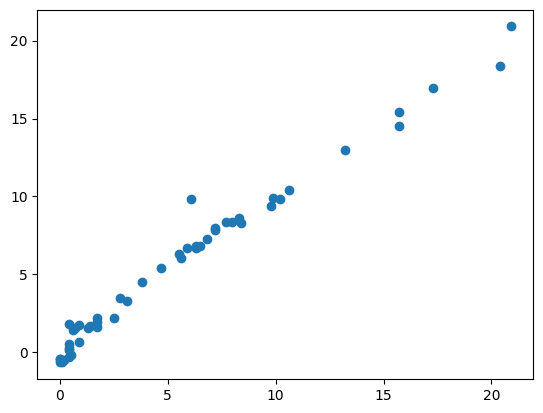

In [81]:
plt.scatter(y_test, y_pred7)

In [82]:
encv.alphas_

array([14.31273339, 13.34810307, 12.44848559, 11.60949933, 10.82705793,
       10.09735046,  9.41682284,  8.78216049,  8.19027227,  7.63827533,
        7.12348114,  6.64338235,  6.19564061,  5.77807517,  5.38865224,
        5.02547512,  4.68677492,  4.37090197,  4.07631781,  3.80158763,
        3.54537335,  3.30642705,  3.08358493,  2.87576163,  2.68194492,
        2.50119081,  2.33261892,  2.17540821,  2.02879298,  1.89205912,
        1.76454067,  1.64561653,  1.53470749,  1.43127334,  1.33481031,
        1.24484856,  1.16094993,  1.08270579,  1.00973505,  0.94168228,
        0.87821605,  0.81902723,  0.76382753,  0.71234811,  0.66433823,
        0.61956406,  0.57780752,  0.53886522,  0.50254751,  0.46867749,
        0.4370902 ,  0.40763178,  0.38015876,  0.35453733,  0.33064271,
        0.30835849,  0.28757616,  0.26819449,  0.25011908,  0.23326189,
        0.21754082,  0.2028793 ,  0.18920591,  0.17645407,  0.16456165,
        0.15347075,  0.14312733,  0.13348103,  0.12448486,  0.11

In [83]:
encv.alpha_

np.float64(0.028757616291182477)

LR=0.9805895859259882  
Lasso=0.9430507350726562  
lassocv=0.9430507350726562  
ridge=0.9801058063273599  
ridgecv=0.9722193780965623  
en=0.8676961352267807  
encv=0.9781014571778188  

above are the model's r2 scores, we will now pick our best model to dump the pickle file.  

We will pickle the ridge model, as I feel it is more accurate and less overfitting prone

Pickle the ML model, preprocessing model standardscaler

In [84]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [85]:
ridge

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [86]:
# pickle.dump(scaler, open('scaler.pkl', 'wb'))
# pickle.dump(ridge, open('ridge.pkl', 'wb'))